In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

#https://colab.research.google.com/github/JeroenMulkers/mumax3-tutorial/blob/master/postprocessing.ipynb#scrollTo=apKunwIp0s6_
def read_mumax3_ovffiles(outputdir):
    """Load all ovffiles in outputdir into a dictionary of numpy arrays 
    with the ovffilename (without extension) as key"""
    
    from subprocess import run, PIPE, STDOUT
    from glob import glob
    from os import path
    from numpy import load

    # convert all ovf files in the output directory to numpy files
    """p = run(["mumax3-convert","-numpy",outputdir+"/*.ovf"], stdout=PIPE, stderr=STDOUT)
    if p.returncode != 0:
        print(p.stdout.decode('UTF-8'))"""

    # read the numpy files (the converted ovf files)
    fields = {}
    for npyfile in glob(outputdir+"/*.npy"):
        key = path.splitext(path.basename(npyfile))[0]
        fields[key] = load(npyfile)
    
    return fields


def show_abs_my(m):
    my_abs = np.abs( m[1,0,:,:] )
    plt.figure()
    plt.imshow(my_abs, vmin=0, vmax=1)
    plt.show()


files=read_mumax3_ovffiles("run.out")

snapshots=[files[fileName] for fileName in sorted(files.keys())]
"""
Data format: m[ic,iz,iy,ix]
#ic is 0,1,2 for x,y,z

"""

dt   = 1e-12  # the sample time
dx   = 2e-9        # cellsize


# Stack all snapshots (4D arrays) of the magnetization on top of each other
# The results in a single 5D array (first index is the snapshot index)
m = np.stack(snapshots)
#m[snapshotIndex, ic, iz, iy, ix]

#select x component of z=0 all layers
mx = m[:,0,0,:,:]
#mx[layer,y,x]


height=len(m[0,0,0])
width=len(m[0,0,0,0])
duration=len(m)
xfftData=np.zeros((height,width,duration))
for y in range(height):
    for x in range(width):
        xHist=m[:,0,0,y,x]
        yHist=m[:,1,0,y,x]
        
        xFFT=np.fft.fft(xHist)
        yFFT=np.fft.fft(yHist)
        
        xfftData[y][x]=xFFT









"""mx_fft=np.fft.fft2(mx)
mx_fft = np.fft.fftshift(mx_fft)



mx=m[:,0,0,80,0]
print(mx)
fft=abs(np.fft.fft(mx))
print(np.argmax(fft))
plt.plot(fft)"""

    









/var/folders/rl/cpjcq0556r36l75xt982r2kh0000gn/T/ipykernel_56924/2064886647.py:71: ComplexWarning: Casting complex values to real discards the imaginary part
  xfftData[y][x]=xFFT


'mx_fft=np.fft.fft2(mx)\nmx_fft = np.fft.fftshift(mx_fft)\n\n\n\nmx=m[:,0,0,80,0]\nprint(mx)\nfft=abs(np.fft.fft(mx))\nprint(np.argmax(fft))\nplt.plot(fft)'

In [2]:


for i in range(0):

    plt.imshow(xfftData[:,:,i*10],cmap="plasma")
    plt.show()

[-0.13676406+0.044822j   -0.10773611+0.07458814j -0.07553341+0.08737372j
 -0.04664535+0.08918621j -0.02052269+0.08495928j  0.00890972+0.07226371j
 -0.00780929+0.07032906j -0.02448349+0.06631114j -0.03691677+0.05749654j
  0.00983803+0.0662141j  -0.04566566+0.04633451j -0.05126287+0.03230149j
  0.02276635+0.05495689j -0.05094662+0.01304665j  0.02850593+0.04151689j
  0.02856298+0.03319706j  0.02877808+0.02988315j -0.03342435-0.00900736j
  0.02624773+0.02124495j  0.02271142+0.01530663j  0.0191221 +0.01141556j
  0.01590664+0.00894434j  0.01319794+0.00738613j  0.0109693 +0.00639787j
  0.00914327+0.00576966j]


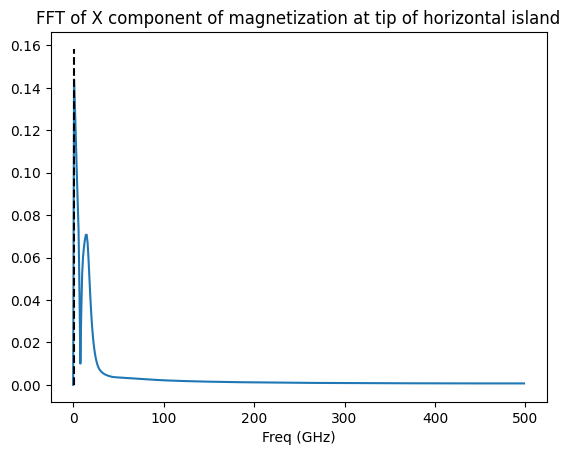

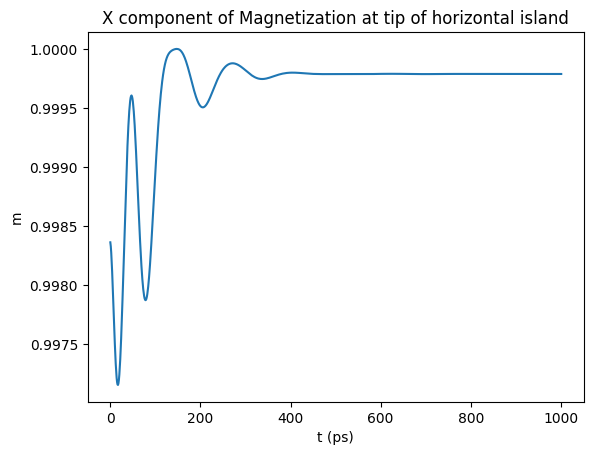

In [8]:
xPos=75
yPos=160

#island length:220
#spacing320

dt=1e-12
times=np.linspace(0,len(m),len(m))


mData=m[:,0,0,yPos,xPos]
n=len(mData)
fftData=np.fft.fft(mData-np.average(mData))[:n//2]
freq=np.fft.fftfreq(n,dt)[:n//2]
argSorted=np.argsort(-np.abs(fftData))

print(fftData[argSorted[0:25]])



plt.plot(freq*1e-9,np.abs(fftData))
plt.vlines(abs(freq[argSorted[0]])*1e-9,0,max(np.abs(fftData))*1.1,"k","--")

plt.xlabel("Freq (GHz)")
plt.title("FFT of X component of magnetization at tip of horizontal island")
plt.show()

plt.plot(times,mData,"-")
plt.xlabel("t (ps)")
plt.ylabel("m")
plt.title("X component of Magnetization at tip of horizontal island")
plt.show()

"""
plt.plot(times,m[:,1,0,yPos,xPos])
plt.xlabel("t (ps)")
plt.ylabel("m")
plt.title("Y component of Magnetization at tip of horizontal island")
"""


def getKeyFrequency(y,x):
    mData=m[:,0,0,y,x]
    n=len(mData)
    fftData=np.fft.fft(mData-np.average(mData))[:n//2]
    freq=np.fft.fftfreq(n,dt)[:n//2]
    argSorted=np.argsort(-np.abs(fftData))
   
   
    return freq[argSorted[0]]
    print(f"Key frequency: {freq[argSorted[0]]*1e-9}GHz")



freqs=np.zeros((len(m[0][0][0]),len(m[0][0][0][0])))
for y in range(len(m[0][0][0])):
    for x in range(len(m[0][0][0][0])):
        freqs[y][x]=getKeyFrequency(y,x)






Text(0.5, 1.0, 'Peak Frequency of X oscillation (GHz)')

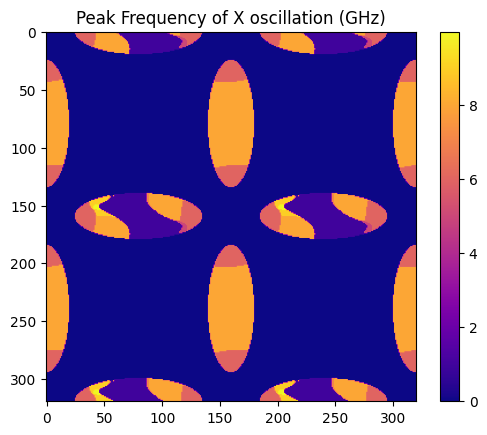

In [6]:
#plt.imshow(xfftData[:,:,argSorted[0]],cmap="plasma")

im=plt.imshow(freqs*1e-9,cmap="plasma")
plt.colorbar()
plt.title("Peak Frequency of X oscillation (GHz)")
